## Sales Prediction for Big Mart Outlets

**The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

### Import libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### Analysis of data

In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#Item_weight has missing values
#Item visibility cannot be zero, if they are being sold

In [8]:
print('Train Shape',train.shape,'\n','Test Shape',test.shape)

Train Shape (8523, 12) 
 Test Shape (5681, 11)


In [9]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
X_=test.copy()
X=train.copy()

In [11]:
#Item_Identifier
print(len(X['Item_Identifier'].value_counts().tolist()))

1559


##### there are 1559 unique values of item_identifier

In [12]:
#Item_Fat_Content
print(X['Item_Fat_Content'].value_counts())
print(X_['Item_Fat_Content'].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


##### Low fat is described as LF and low fat , Regular as reg so we have to combine them

<AxesSubplot:>

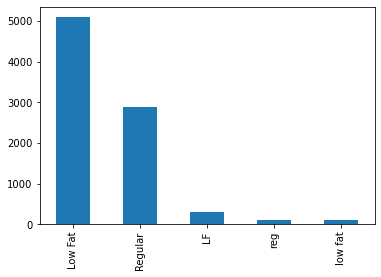

In [13]:
X['Item_Fat_Content'].value_counts().plot.bar()

In [14]:
#Item_Type
print(len(X['Item_Type'].unique().tolist()))
print(X['Item_Type'].value_counts())

16
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


<AxesSubplot:>

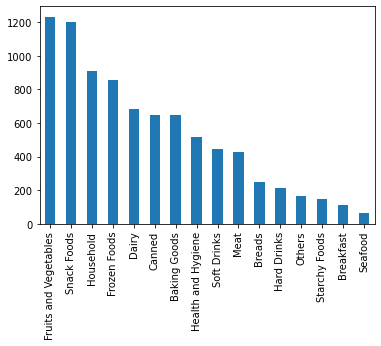

In [15]:
X['Item_Type'].value_counts().plot.bar()

##### There are 16 item types

<AxesSubplot:>

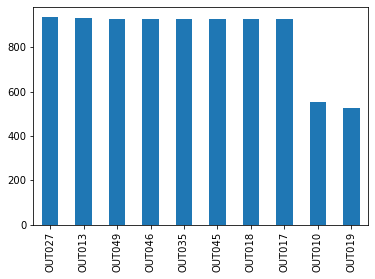

In [16]:
#Outlet_identifier
X['Outlet_Identifier'].value_counts().plot.bar()


##### There are 9 Outlets 

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


<AxesSubplot:>

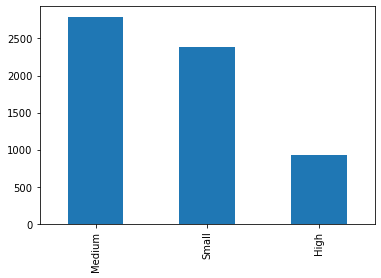

In [17]:
#Outlet Size
print(X['Outlet_Size'].value_counts())
X['Outlet_Size'].value_counts().plot.bar()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


<AxesSubplot:>

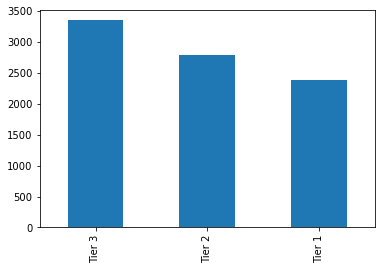

In [18]:
#Outlet_Location_Type
print(X['Outlet_Location_Type'].value_counts())
X['Outlet_Location_Type'].value_counts().plot.bar()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


<AxesSubplot:>

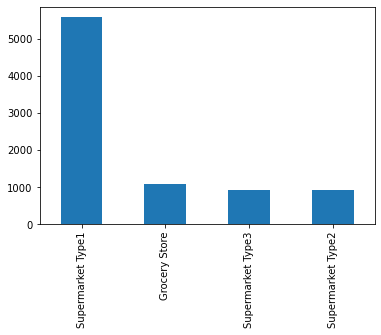

In [19]:
print(X['Outlet_Type'].value_counts())
X['Outlet_Type'].value_counts().plot.bar()

### Bivariate Analysis

In [20]:
#Item_Identifier               object
#Item_Weight                  float64
#Item_Fat_Content              object
#Item_Visibility              float64
#Item_Type                     object
#Item_MRP                     float64
#Outlet_Identifier             object
#Outlet_Establishment_Year      int64
#Outlet_Size                   object
#Outlet_Location_Type          object
#Outlet_Type                   object
#Item_Outlet_Sales            float64

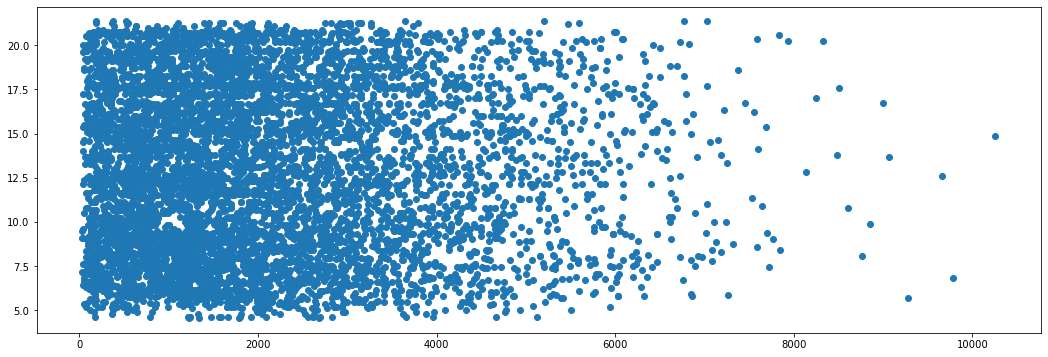

In [21]:
plt.figure(figsize=(18,6))
plt.scatter(x=X['Item_Outlet_Sales'],y=X['Item_Weight'])

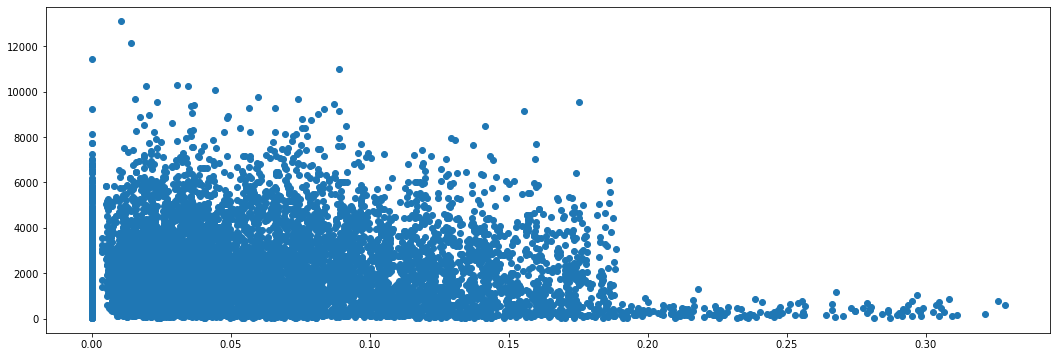

In [22]:
plt.figure(figsize=(18,6))
plt.scatter(x=X['Item_Visibility'],y=X['Item_Outlet_Sales'])

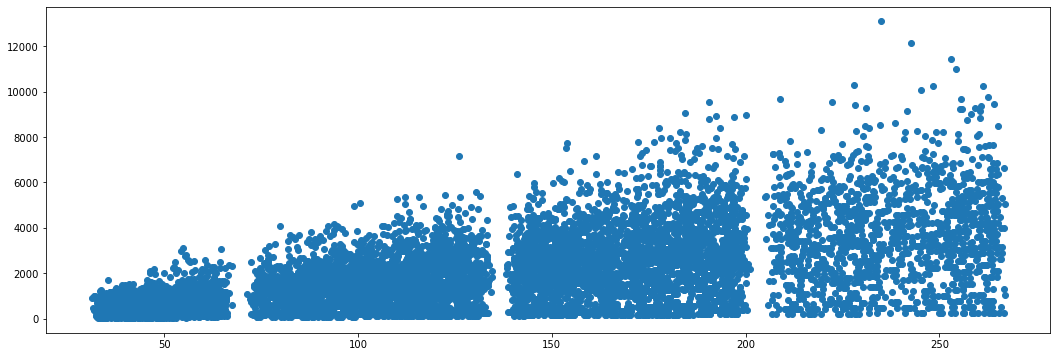

In [23]:
plt.figure(figsize=(18,6))
plt.scatter(x=X['Item_MRP'],y=X['Item_Outlet_Sales'])

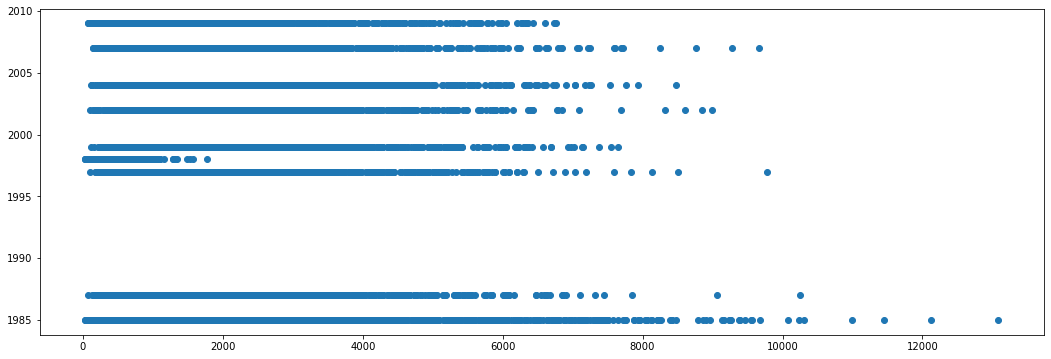

In [24]:
plt.figure(figsize=(18,6))
plt.scatter(x=X['Item_Outlet_Sales'],y=X['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size'>

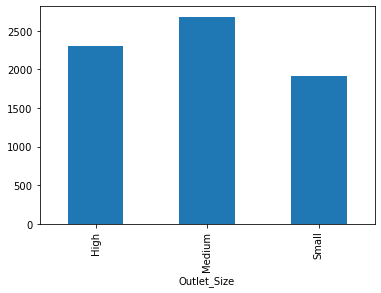

In [25]:
X.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot.bar()

<AxesSubplot:xlabel='Outlet_Location_Type'>

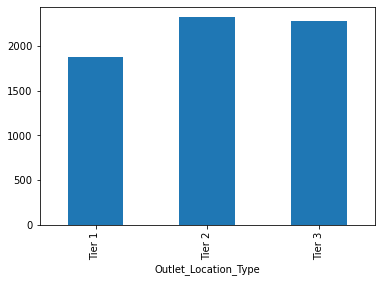

In [26]:
X.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot.bar()

<AxesSubplot:xlabel='Outlet_Type'>

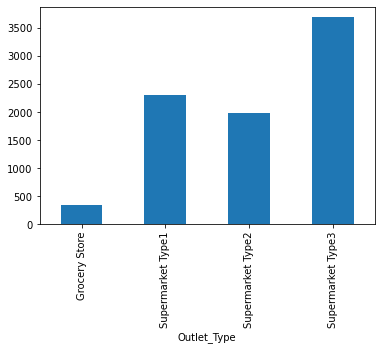

In [27]:
X.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()
#supermarket type 3 has more sales

<AxesSubplot:xlabel='Outlet_Identifier'>

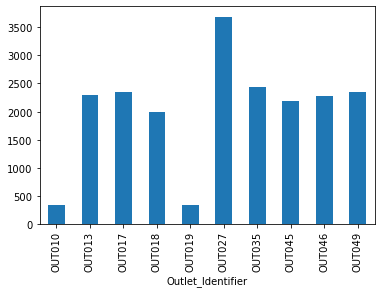

In [28]:
X.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().plot.bar()


### Feature Engineering 

In [29]:
#converting Item_fat_content into 2 categories
X['Item_Fat_Content']=X['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                     'reg':'Regular',
                                                     'low fat':'Low Fat'})
print(X['Item_Fat_Content'].value_counts())

X_['Item_Fat_Content']=X_['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                     'reg':'Regular',
                                                     'low fat':'Low Fat'})

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [30]:
print(X['Item_Fat_Content'].value_counts())
X['Item_Fat_Content'].unique()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


array(['Low Fat', 'Regular'], dtype=object)

In [31]:
for x in X[X['Item_Visibility']==0].index:
    X.loc[x,'Item_Visibility']=X['Item_Visibility'].mean()
#replaced Item_Visibilty= 0 with mean of Item_visibilty
for x in X_[X_['Item_Visibility']==0].index:
    X_.loc[x,'Item_Visibility']=X_['Item_Visibility'].mean()

In [32]:
X.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070342,140.992782,1997.831867,2181.288914
std,4.643456,0.048734,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.773750,0.033085,93.826500,1987.000000,834.247400
50%,12.600000,0.062517,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [33]:
X_.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.069894,141.023273,1997.828903
std,4.664849,0.048387,61.809091,8.372256
min,4.555000,0.003591,31.990000,1985.000000
25%,8.645000,0.033208,94.412000,1987.000000
50%,12.500000,0.062137,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


### Missing Value 

In [34]:
print(X.isnull().sum())
print(X_.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [35]:
X.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070342,140.992782,1997.831867,2181.288914
std,4.643456,0.048734,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.773750,0.033085,93.826500,1987.000000,834.247400
50%,12.600000,0.062517,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [36]:
X['Item_Weight'].fillna(X['Item_Weight'].mean(), inplace=True)
X_['Item_Weight'].fillna(X_['Item_Weight'].mean(),inplace=True)

In [37]:
X['Outlet_Size'].fillna(X['Outlet_Size'].mode()[0],inplace=True)
X_['Outlet_Size'].fillna(X_['Outlet_Size'].mode()[0],inplace=True)

In [38]:
print(X.isnull().sum())
print(X_.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [39]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066140,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Outlier Analysis

In [40]:
cnames=['Item_Weight','Item_Visibility','Item_MRP']

In [41]:
##Detect and delete outliers from data
for i in range(0,3):
    print(X.shape)
    for i in cnames:    
        q75, q25 = np.percentile(X.loc[:,i], [75 ,25])
        iqr = q75 - q25
        min = q25 - (iqr*1.5)
        max = q75 + (iqr*1.5)
        X= X.drop(X[X.loc[:,i] < min].index)
        X= X.drop(X[X.loc[:,i] > max].index)


(8523, 12)
(8350, 12)
(8294, 12)


In [42]:
print(X.shape)
print(X_.shape)

(8274, 12)
(5681, 11)


In [43]:
Y=X['Item_Outlet_Sales']

In [44]:
X1=X.copy()
X2=X_.copy()

In [45]:
X1=X1.drop('Item_Outlet_Sales',axis=1)
X1.drop('Item_Identifier',axis=1,inplace=True)
X1.drop('Outlet_Establishment_Year',axis=1,inplace=True)

X2.drop('Item_Identifier',axis=1,inplace=True)
X2.drop('Outlet_Establishment_Year',axis=1,inplace=True)

#Outlet_Size
#Outlet_Location_Type
#Outlet_Type

In [46]:
print(X1.shape)
print(X2.shape)

(8274, 9)
(5681, 9)


### Encoding

In [47]:
X1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store
4,8.93,Low Fat,0.066140,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1


In [48]:
X1=pd.get_dummies(X1)

In [49]:
X2=pd.get_dummies(X2)
X2.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315000,0.015388,155.0340,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.695633,0.118599,234.2300,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [50]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8274, dtype: float64

### Normalization

In [74]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler



# numerical features
num_cols = ['Item_Weight','Item_Visibility','Item_MRP']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X1[[i]])
    
    # transform the training data column
    X1[i] = scale.transform(X1[[i]])
    
    # transform the testing data column
    X2[i] = scale.transform(X2[[i]])

In [75]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X1,Y,test_size=0.3,random_state=0)

In [76]:
def rmse(Y,Ypred):
    rmse_error=np.sqrt(((Y-Ypred)**2).mean())
    return rmse_error

In [77]:

###### DecisionTree Modelling ##########
def DT(depth):
    dt = DecisionTreeRegressor( max_depth = depth)
    dt_model = dt.fit(Xtrain, Ytrain)
    ypred = dt_model.predict(Xtest)
    print('depth : {} ----  Decision Tree RMSE: {}'.format(depth,mean_squared_error(Ytest,ypred,squared=False)))
    
for depth in [1,2,5,10,20,30,40,50]:
    DT(depth)

depth : 1 ----  Decision Tree RMSE: 1447.8454835251505
depth : 2 ----  Decision Tree RMSE: 1279.2715458916578
depth : 5 ----  Decision Tree RMSE: 1096.7436234472145
depth : 10 ----  Decision Tree RMSE: 1207.9466535020647
depth : 20 ----  Decision Tree RMSE: 1496.292292470367
depth : 30 ----  Decision Tree RMSE: 1531.7290824668435
depth : 40 ----  Decision Tree RMSE: 1548.2216743708805
depth : 50 ----  Decision Tree RMSE: 1533.766796407305


In [78]:
def train_RF(n_est, depth,msl,mss):
    rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth, n_jobs=-1,min_samples_leaf=msl,min_samples_split=mss)
    rf_model = rf.fit(Xtrain, Ytrain)
    y_pred = rf_model.predict(Xtest)
    print('depth : {}, n_estimators : {}, min_samples_leaf :{},min_samples_split:{} ---- Random Forest Regression RMSE: {}'.format(depth, n_est,msl,mss,mean_squared_error(Ytest,y_pred,squared=False)))  

for n_est in [200]:
    for depth in [6]:
        for msl in [10,11,12]:
            for mss in [10,11,12]:
                train_RF(n_est, depth,msl,mss)

depth : 6, n_estimators : 200, min_samples_leaf :10,min_samples_split:10 ---- Random Forest Regression RMSE: 1089.05435826219
depth : 6, n_estimators : 200, min_samples_leaf :10,min_samples_split:11 ---- Random Forest Regression RMSE: 1089.1567923133455
depth : 6, n_estimators : 200, min_samples_leaf :10,min_samples_split:12 ---- Random Forest Regression RMSE: 1089.01505078945
depth : 6, n_estimators : 200, min_samples_leaf :11,min_samples_split:10 ---- Random Forest Regression RMSE: 1089.562582878023
depth : 6, n_estimators : 200, min_samples_leaf :11,min_samples_split:11 ---- Random Forest Regression RMSE: 1089.6200745479362
depth : 6, n_estimators : 200, min_samples_leaf :11,min_samples_split:12 ---- Random Forest Regression RMSE: 1090.4838549726755
depth : 6, n_estimators : 200, min_samples_leaf :12,min_samples_split:10 ---- Random Forest Regression RMSE: 1089.2084271085964
depth : 6, n_estimators : 200, min_samples_leaf :12,min_samples_split:11 ---- Random Forest Regression RMSE: 

In [79]:
rf=RandomForestRegressor(n_estimators=200,max_depth=6,random_state=0,min_samples_leaf=10,min_samples_split=11)
rf_model=rf.fit(Xtrain,Ytrain)
y_pred=rf_model.predict(X2)

In [80]:
y_pred=pd.Series(y_pred)

In [81]:
data=(X_['Item_Identifier'],X_['Outlet_Identifier'],y_pred)

In [82]:
headers = ["Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"]

In [83]:
df3=pd.concat(data,axis=1,keys=headers)

In [84]:
df3.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1594.238167
1,FDW14,OUT017,1399.828976
2,NCN55,OUT010,587.767633
3,FDQ58,OUT017,2463.261349
4,FDY38,OUT027,6394.223782


In [85]:
df3.to_csv("submission.csv",index=False)